# Problem 2.2

**Integrated Energy Grids**


**Problem 2.2**

**Consider the following economic dispatch problem:**
- **we have three generators: solar, wind and gas**
- **solar and wind have no marginal costs, and gas has fuel costs of 60 EUR/MWh.**
- **we need to cover demand of 13.2 MWh**
- **the installed capacities are 15 MW, 20 MW and 20 MW for wind, solar, and gas, respectively**
- **assume the capacity factor for solar is 0.17 and for wind 0.33.**


**a) Use linopy to define and solve the LP and find the optimal solution as well as reading out the Lagrange multipliers as defined in the lecture.**

**b) Open [problem2_2b.csv](./data/problem2_2b.csv), and use the values as inputs for capacity factors as well as demand in the dispatch problem. Solve the LP with linopy.**

**c) Open [problem2_2c.csv](./data/problem2_2c.csv), and use the values as inputs for capacity factors as well as demand in the dispatch problem. Solve the LP with linopy.**

**d) Compare the share of renewable generation, the dual variables, and the objective from a)-c) [average, median, min, max] and interpret the differences. Compute the curtailment from renewables.**

**e) Plot the supply and demand curves for the different resources in c). Also consider demand - renewable generation ("net load"). Could transmission or storage be useful for this system? Why or why not?**

We will use numpy to operate with arrays and matplotlib.pyplot to plot the results. We also use linopy to solve linear problems and work with pandas to work with dataframes.

In [26]:
import pandas as pd
import numpy as np
import linopy 
import matplotlib.pyplot as plt

a)

Define the capacities of the generators.

In [27]:
# Installed capacities
wind = 15
solar = 20
gas = 20


Set the marginal costs of gas.

In [28]:
# Marginal costs (for solar and wind 0)
cost_gas = 60


Fix demand and capacity factors.

In [29]:
# Fixed demand
demand_2a = 13.2

# Capacity factors
solar_cf = 0.17
wind_cf = 0.33

Set up the minimization problem in linopy.

In [30]:
m22 = linopy.Model()

# Define variables
x_w = m22.add_variables(lower=0,name="wind")
x_s = m22.add_variables(lower=0,name="solar")
x_g = m22.add_variables(lower=0,name="gas")

# Define constraints
m22.add_constraints(x_w + x_s + x_g == demand_2a, name="energy_balance")

m22.add_constraints(x_g <= gas, name="gas_cap")

m22.add_constraints(x_w <= wind * wind_cf, name="wind_cf")
m22.add_constraints(x_s <= solar * solar_cf, name="solar_cf")

# Optional:
m22.add_constraints(x_w <= wind, name="wind_cap")
m22.add_constraints(x_s <= solar, name="solar_cap")

# Objective
m22.add_objective(cost_gas*x_g, sense = "min")

# Solve
m22.solve(solver_name="gurobi")

m22.solution


Set parameter Username
Set parameter LicenseID to value 2604332
Academic license - for non-commercial use only - expires 2025-12-30
Read LP format model from file C:\Users\34620\AppData\Local\Temp\linopy-problem-to3cwcys.lp
Reading time = 0.00 seconds
obj: 6 rows, 3 columns, 8 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 3 columns and 8 nonzeros
Model fingerprint: 0x81cdebb7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 6 rows and 3 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9100000e+02   0.000000e+00   0.000000e+00      

<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    wind     float64 8B 4.95
    solar    float64 8B 3.4
    gas      float64 8B 4.85

Print the duals

In [31]:
m22.dual

<xarray.Dataset> Size: 48B
Dimensions:         ()
Data variables:
    energy_balance  float64 8B 60.0
    gas_cap         float64 8B 0.0
    wind_cf         float64 8B -60.0
    solar_cf        float64 8B -60.0
    wind_cap        float64 8B 0.0
    solar_cap       float64 8B 0.0

b)

Read the data for problem 2b.

In [32]:
problem2b = pd.read_csv("./data/problem2_2b.csv", index_col=0, parse_dates=True)

Define the model. Note that there is a time dimension to the data we loaded, so add a time coordinate to the variables

In [33]:
m22b = linopy.Model()

# Define variables
time = problem2b.index

x_w = m22b.add_variables(lower=0,name="wind", coords=[time])
x_s = m22b.add_variables(lower=0,name="solar", coords=[time])
x_g = m22b.add_variables(lower=0,name="gas", coords=[time])

# Define constraints
m22b.add_constraints(x_w + x_s + x_g == problem2b["demand [MWh]"], name="energy_balance")
m22b.add_constraints(x_g <= gas, name="gas_cap")

m22b.add_constraints(x_w <= wind * problem2b["wind cf"], name="wind_cf")
m22b.add_constraints(x_s <= solar * problem2b["solar cf"], name="solar_cf")

# Optional:
m22b.add_constraints(x_w <= wind, name="wind_cap")
m22b.add_constraints(x_s <= solar, name="solar_cap")

# Objective
m22b.add_objective(cost_gas*x_g, sense = "min")

# Solve
m22b.solve(solver_name="gurobi")

m22b.solution


Set parameter Username
Set parameter LicenseID to value 2604332
Academic license - for non-commercial use only - expires 2025-12-30
Read LP format model from file C:\Users\34620\AppData\Local\Temp\linopy-problem-mvdve_d7.lp
Reading time = 0.00 seconds
obj: 24 rows, 12 columns, 32 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 24 rows, 12 columns and 32 nonzeros
Model fingerprint: 0xf7153d36
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 2e+01]
Presolve removed 24 rows and 12 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2204000e+03   0.000000e+00   0.000000e+

<xarray.Dataset> Size: 128B
Dimensions:  (dim_0: 4)
Coordinates:
  * dim_0    (dim_0) datetime64[ns] 32B 2020-07-01T06:00:00 ... 2020-07-02
Data variables:
    wind     (dim_0) float64 32B 5.7 4.05 4.05 5.85
    solar    (dim_0) float64 32B 0.0 3.0 9.6 0.6
    gas      (dim_0) float64 32B 4.83 6.88 1.68 6.95

Compute the duals


In [34]:
m22b.dual

<xarray.Dataset> Size: 224B
Dimensions:         (dim_0: 4)
Coordinates:
  * dim_0           (dim_0) datetime64[ns] 32B 2020-07-01T06:00:00 ... 2020-0...
Data variables:
    energy_balance  (dim_0) float64 32B 60.0 60.0 60.0 60.0
    gas_cap         (dim_0) float64 32B 0.0 0.0 0.0 0.0
    wind_cf         (dim_0) float64 32B -60.0 -60.0 -60.0 -60.0
    solar_cf        (dim_0) float64 32B -60.0 -60.0 -60.0 -60.0
    wind_cap        (dim_0) float64 32B 0.0 0.0 0.0 0.0
    solar_cap       (dim_0) float64 32B 0.0 0.0 0.0 0.0

c)

Load the data for problem 2c.

In [35]:
problem2c = pd.read_csv("./data/problem2_2c.csv", index_col=0, parse_dates=True)


As above set up the linopy model.

In [36]:
m22c = linopy.Model()

# Define variables
time = problem2c.index

x_w = m22c.add_variables(lower=0,name="wind", coords=[time])
x_s = m22c.add_variables(lower=0,name="solar", coords=[time])
x_g = m22c.add_variables(lower=0,name="gas", coords=[time])

# Define constraints
m22c.add_constraints(x_w + x_s + x_g == problem2c["demand [MWh]"], name="energy_balance")
m22c.add_constraints(x_g <= gas, name="gas_cap")

m22c.add_constraints(x_w <= wind * problem2c["wind cf"], name="wind_cf")
m22c.add_constraints(x_s <= solar * problem2c["solar cf"], name="solar_cf")

# Optional:
m22c.add_constraints(x_w <= wind, name="wind_cap")
m22c.add_constraints(x_s <= solar, name="solar_cap")

# Objective
m22c.add_objective(cost_gas*x_g, sense = "min")

# Solve
m22c.solve(solver_name="gurobi")

m22c.solution


Set parameter Username
Set parameter LicenseID to value 2604332
Academic license - for non-commercial use only - expires 2025-12-30
Read LP format model from file C:\Users\34620\AppData\Local\Temp\linopy-problem-94w6_lw6.lp
Reading time = 0.00 seconds
obj: 144 rows, 72 columns, 192 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 144 rows, 72 columns and 192 nonzeros
Model fingerprint: 0x753455ff
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 2e+01]
Presolve removed 144 rows and 72 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.6950000e+03   0.000000e+00   0.000

<xarray.Dataset> Size: 768B
Dimensions:  (dim_0: 24)
Coordinates:
  * dim_0    (dim_0) datetime64[ns] 192B 2020-07-01 ... 2020-07-01T23:00:00
Data variables:
    wind     (dim_0) float64 192B 5.85 6.45 6.15 5.85 5.4 ... 5.7 6.15 6.3 6.9
    solar    (dim_0) float64 192B 0.0 0.0 0.0 0.0 0.0 ... 0.6 0.0 0.0 0.0 0.0
    gas      (dim_0) float64 192B 4.95 3.95 4.25 4.35 4.6 ... 7.9 6.45 5.5 4.5

Compute the duals

In [37]:
m22c.dual

<xarray.Dataset> Size: 1kB
Dimensions:         (dim_0: 24)
Coordinates:
  * dim_0           (dim_0) datetime64[ns] 192B 2020-07-01 ... 2020-07-01T23:...
Data variables:
    energy_balance  (dim_0) float64 192B 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0
    gas_cap         (dim_0) float64 192B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    wind_cf         (dim_0) float64 192B -60.0 -60.0 -60.0 ... -60.0 -60.0 -60.0
    solar_cf        (dim_0) float64 192B -60.0 -60.0 -60.0 ... -60.0 -60.0 -60.0
    wind_cap        (dim_0) float64 192B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    solar_cap       (dim_0) float64 192B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

d)

Compute the renewable share in the production as the wind and solar generation in each hour divided by the demand. Plot the time series from 2c in matplotlib.pyplot.

C:\Users\34620\AppData\Local\Temp\ipykernel_8328\135273699.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


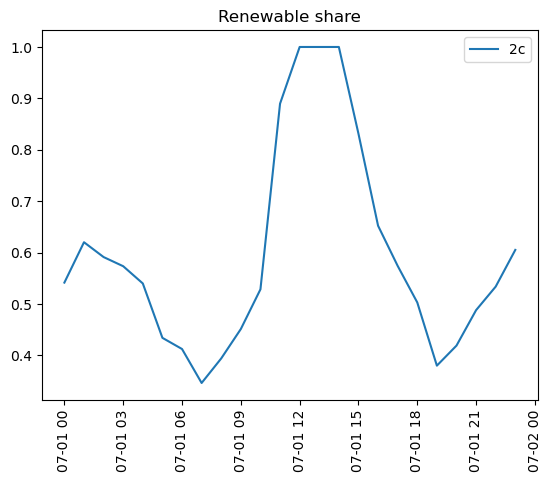

In [38]:
# Renewable share
fig, ax = plt.subplots()

renewable_share_2a = (m22.solution["wind"] + m22.solution["solar"] )/ demand_2a
renewable_share_2b = pd.Series(data=(m22b.solution["wind"] + m22b.solution["solar"]) / problem2b["demand [MWh]"], index=problem2b.index)
renewable_share_2c = pd.Series(data=(m22c.solution["wind"] + m22c.solution["solar"]) / problem2c["demand [MWh]"], index=problem2c.index)


ax.plot(renewable_share_2c, label="2c");
ax.set_title("Renewable share");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.legend();

In [39]:
print("Renewable share 2a: ", renewable_share_2a.values)
print("Renewable share 2b: ", renewable_share_2b.mean())
print("Renewable share 2c: ", renewable_share_2c.mean())

Renewable share 2a:  0.6325757575757576
Renewable share 2b:  0.6047916805148708
Renewable share 2c:  0.5962939748513115


Plot the dual variables / electricity prices from b and c, and print them for a

Electricity price (a): 60.0
Electricity price (b): count     4.0
mean     60.0
std       0.0
min      60.0
25%      60.0
50%      60.0
75%      60.0
max      60.0
Name: energy_balance, dtype: float64
Electricity price (c): count    24.000000
mean     52.500000
std      20.269918
min       0.000000
25%      60.000000
50%      60.000000
75%      60.000000
max      60.000000
Name: energy_balance, dtype: float64


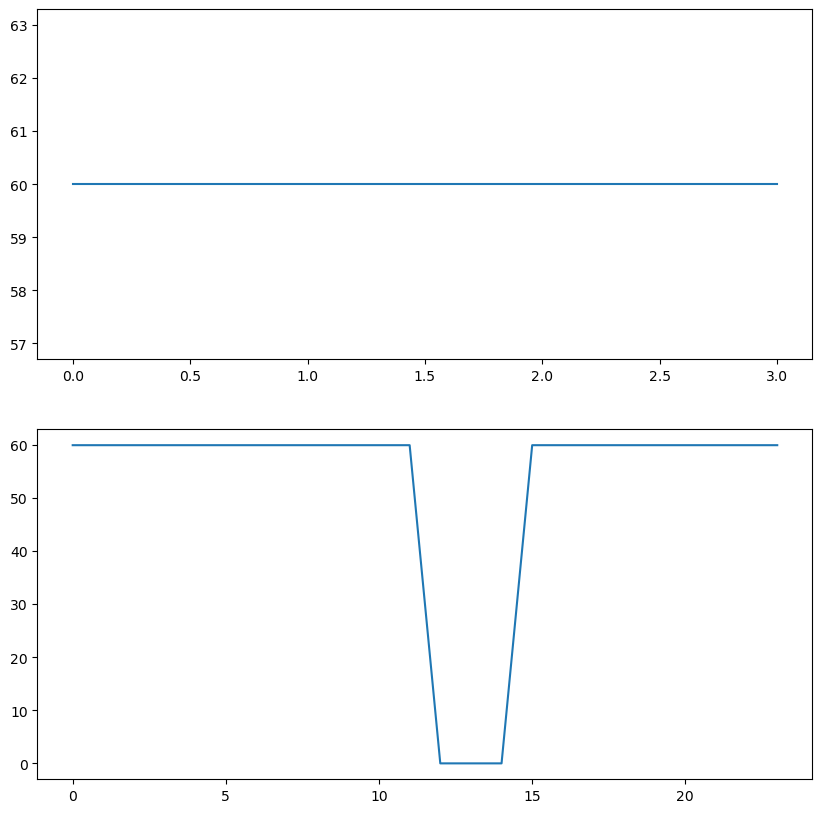

In [40]:

fig, axs = plt.subplots(2,1, figsize=(10,10))

axs[0].plot(m22b.dual.energy_balance, label="Electricity price (b)")
axs[1].plot(m22c.dual.energy_balance, label="Electricity price (c)")


print("Electricity price (a):", m22.dual.energy_balance.values.mean())
print("Electricity price (b):", m22b.dual.energy_balance.to_pandas().describe())
print("Electricity price (c):", m22c.dual.energy_balance.to_pandas().describe())

Compare the objective from a to c as well as the average cost per hour. Note that with higher detail and higher spatial resolution of the renewables the costs increase on average (even more so for the objective which has more time steps). This is because fluctuations in generations are less smoothed.

In [41]:
print("Objective 2a: ", m22.objective.value, " and average cost per hour: ", m22.objective.value)
print("Objective 2b: ", m22b.objective.value, " and average cost per hour: ", m22b.objective.value/len(problem2b))
print("Objective 2c: ", m22c.objective.value, " and average cost per hour: ", m22c.objective.value/len(problem2c))

Objective 2a:  290.99999999999994  and average cost per hour:  290.99999999999994
Objective 2b:  1220.4  and average cost per hour:  305.1
Objective 2c:  7695.0  and average cost per hour:  320.625


Print curtailment as the difference between renewable potential (capacity factor * capacity) for each hour and the renewable generation in the solutions.

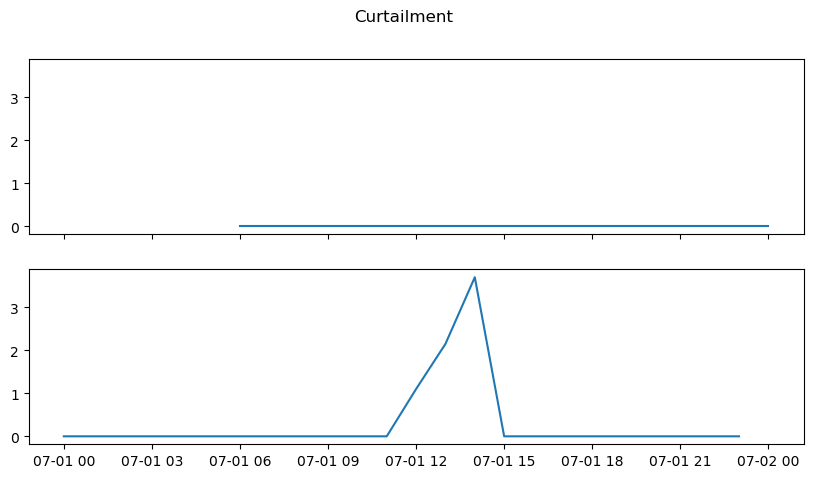

In [42]:
# Curtailment
fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True, sharey=True)

ren_pot_2b = solar * problem2b["solar cf"] + wind * problem2b["wind cf"]
ren_pot_2c = solar * problem2c["solar cf"] + wind * problem2c["wind cf"]

curtailment_2b = ren_pot_2b - (m22b.solution["wind"] + m22b.solution["solar"])
curtailment_2c = ren_pot_2c - (m22c.solution["wind"] + m22c.solution["solar"])

ax[0].plot(curtailment_2b, label="2b")
ax[1].plot(curtailment_2c, label="2c")

fig.suptitle("Curtailment");



e)

Plot the supply curves by sorting the generation for each technology (and resetting the index). Do the same for the demand.

Compute net load as the difference of renewable generation and demand.

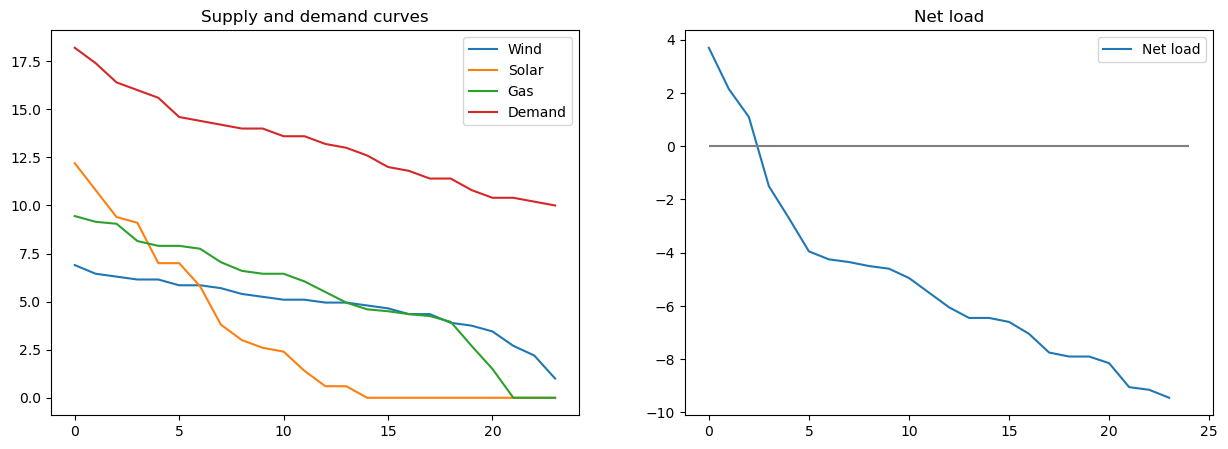

In [43]:
# Plot supply curves from c)

fig, axs = plt.subplots(1,2, figsize=(15,5))

ax = axs[0]
ax.set_title(f"Supply and demand curves")

ax.plot(m22c.solution.wind.to_pandas().sort_values(ascending=False).reset_index(drop=True), label="Wind")
ax.plot(m22c.solution.solar.to_pandas().sort_values(ascending=False).reset_index(drop=True), label="Solar")
ax.plot(m22c.solution.gas.to_pandas().sort_values(ascending=False).reset_index(drop=True), label="Gas")
ax.plot(problem2c["demand [MWh]"].sort_values(ascending=False).reset_index(drop=True), label="Demand")

ax.legend()

ax = axs[1]
ax.set_title(f"Net load")
ax.plot((problem2c["solar cf"] * solar + problem2c["wind cf"] * wind - problem2c["demand [MWh]"]).sort_values(ascending=False).reset_index(drop=True), label="Net load")
ax.hlines(0, 0, 24, color="grey")

ax.legend()

We have some curtailment as seen in d), so for the few hours of surplus it would be useful to smooth production in one way or another, either through transmission, or storage, or demand response.